<h2><font color="#004D7F" size=6>TCGA Data Analysis Tool 1.0 </font></h2>
<h3><font color="#004D7F" size=4>- Jorge Iván Díaz Riaño PhD(c)  </font></h3>

<h1><font color="#004D7F" size=4>1. Loading and preprocessing data</font></h1>

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
#Loading required packages and libraries
from IPython.display import display, HTML
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
from lifelines import KaplanMeierFitter
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import LinearSegmentedColormap
import warnings
import io
from ipywidgets import FileUpload, Button
from IPython.display import display
from sklearn.cluster import DBSCAN
from scipy.stats import expon

In [3]:
dataset=input("Enter path for csv file: ") #C:\\Users\\TTUSVM\\Documents\\GitHub\\TCGA-TTU\\TC3R\\Input\MAGE-TCGA-GBM_tpm_clinical.csv

Enter path for csv file: C:\\Users\\TTUSVM\\Documents\\GitHub\\TCGA-TTU\\TC3R\\Input\MAGE-TCGA-GBM_tpm_clinical.csv


In [4]:
# replace empty/invalid values with NaN
data= pd.read_csv(dataset, sep=',')
df = pd.DataFrame(data)
df.replace("\'--", np.nan, inplace=True)
df.replace('not reported', np.nan, inplace=True)
df.replace('Not Reported', np.nan, inplace=True)
df.set_index('sample', inplace=True)
df.head(4)

,TRO,NDN,NSMCE3,MAGEC2,MAGEB2,MAGED2,MAGEB4,MAGEA9,MAGEA10,TRIM28,...,treatment_arm,treatment_dose,treatment_dose_units,treatment_effect,treatment_effect_indicator,treatment_frequency,treatment_intent_type,treatment_or_therapy,treatment_outcome,treatment_type
sample,,,,,,,,,,,,,,,,,,,,,
TCGA-02-0047,25.8521,101.6848,13.5235,0.0482,0.0598,337.5721,0.0,0.0,0.0000,193.3670,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,"Pharmaceutical Therapy, NOS"
TCGA-02-0055,14.5075,89.6786,26.6422,0.2301,0.1428,349.1256,0.0,0.0,0.0264,155.1753,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,"Radiation Therapy, NOS"
TCGA-02-2483,31.8243,145.3807,25.4736,1.0924,0.0000,358.0033,0.0,0.0,0.0000,425.5501,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,"Pharmaceutical Therapy, NOS"
TCGA-02-2485,39.4224,88.7591,32.5229,0.1313,0.0000,364.7759,0.0,0.0,0.0000,487.4934,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,"Pharmaceutical Therapy, NOS"


In [5]:
# Count of null data points
print(df.isnull().sum())

TRO                        0
NDN                        0
NSMCE3                     0
MAGEC2                     0
MAGEB2                     0
                        ... 
treatment_frequency      169
treatment_intent_type    169
treatment_or_therapy       9
treatment_outcome        169
treatment_type             1
Length: 202, dtype: int64


In [6]:
# drop columns with >0.8 NaN's
df = df.loc[:, df.isnull().mean() < .8]
#df.info()

In [7]:
df.describe()

,TRO,NDN,NSMCE3,MAGEC2,MAGEB2,MAGED2,MAGEB4,MAGEA9,MAGEA10,TRIM28,...,MAGEB1,MAGEA3,MAGEA7P,MAGEA5,CSAG4,MAGEL2,MAGEA9B,MAGEA2,CSAG2,CSAG3
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,...,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,34.700905,67.906123,21.505401,1.376357,0.051341,332.688191,0.001377,0.016925,0.008455,262.901669,...,0.010230,0.165129,0.004552,0.001862,0.077508,3.807359,0.137654,0.003274,0.144398,0.442263
std,24.909444,75.354135,6.276264,10.909120,0.178642,148.870570,0.006667,0.139242,0.044131,112.424443,...,0.025068,0.640966,0.019571,0.014376,0.108612,6.612708,1.708135,0.011815,1.024924,2.377070
min,6.625700,2.160300,8.817000,0.000000,0.000000,151.831300,0.000000,0.000000,0.000000,67.721500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.125500,0.000000,0.000000,0.000000,0.000000
25%,19.840000,11.473100,17.419100,0.034000,0.000000,258.648100,0.000000,0.000000,0.000000,177.140100,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.169100,0.000000,0.000000,0.000000,0.000000
50%,30.460900,49.025000,21.318500,0.076200,0.000000,304.957300,0.000000,0.000000,0.000000,249.135300,...,0.000000,0.040300,0.000000,0.000000,0.000000,2.394000,0.000000,0.000000,0.000000,0.080900
75%,40.820400,111.650800,24.422800,0.181000,0.052100,358.003300,0.000000,0.000000,0.000000,325.502600,...,0.000000,0.095800,0.000000,0.000000,0.111100,3.604200,0.000000,0.000000,0.060800,0.220500
max,210.250400,713.482600,43.004700,137.858300,2.162600,1327.617000,0.037100,1.334800,0.457900,728.133100,...,0.166400,6.552200,0.120600,0.143900,0.604300,68.194500,22.202800,0.080900,12.231800,30.063700


<h1><font color="#004D7F" size=5>2. Visualization</font></h1>

In [8]:
df_numeric = df.select_dtypes(include=['number'])
# Reorder columns based on the provided order
column_order = [
    "MAGEA1", "MAGEA2", "MAGEA2B", "MAGEA3", "MAGEA4", "MAGEA5", "MAGEA6", "MAGEA7P", "MAGEA8", "MAGEA9",
    "MAGEA9B", "MAGEA10", "MAGEA11", "MAGEA12", "MAGEB1", "MAGEB2", "MAGEB3", "MAGEB4", "MAGEB5", "MAGEB6",
    "MAGEB10", "MAGEB16", "MAGEB17", "MAGEB18", "MAGEC1", "MAGEC2", "MAGEC3", "MAGED1", "MAGED2", "TRO","MAGED4",
    "MAGED4B", "MAGEE1", "MAGEE2", "MAGEF1", "NSMCE3","MAGEH1", "MAGEL2", "CSAG1", "CSAG2", "CSAG3", "CSAG4", "TRIM28", "NDN"
]
df_numeric = df_numeric[column_order]

<h1><font color="#004D7F" size=4>2.1 Distribution of TPMs expression.</font></h1>

In [9]:
# Set colors
colors_pastel = sns.color_palette("Set2")

def plot_gene_histograms_type1(gene_list):
    plt.figure(figsize=(15, 10))
    for gene in gene_list:
        plt.subplot(5, 6, gene_list.index(gene) + 1)
        plt.hist(np.log10(df_numeric[gene] + 1), bins=20, color=colors_pastel[2], edgecolor='black')  # Using color from palette
        plt.title(gene)
        plt.xlabel('Log10(TPM+1)')
        plt.ylabel('Frequency')
        plt.grid(True)
    plt.tight_layout()
    plt.show()
    
def plot_gene_histograms_type2(gene_list):
    plt.figure(figsize=(15, 10))
    for gene in gene_list:
        plt.subplot(5, 6, gene_list.index(gene) + 1)
        plt.hist(np.log10(df_numeric[gene] + 1), bins=20, color=colors_pastel[5], edgecolor='black')  # Using color from palette
        plt.title(gene)
        plt.xlabel('Log10(TPM+1)')
        plt.ylabel('Frequency')
        plt.grid(True)
    plt.tight_layout()
    plt.show()

In [23]:
Type1 = ["MAGEA1", "MAGEA2", "MAGEA2B", "MAGEA3", "MAGEA4", "MAGEA5", "MAGEA6", "MAGEA7P", "MAGEA8", "MAGEA9","MAGEA9B", "MAGEA10", "MAGEA11", "MAGEA12", "MAGEB1", "MAGEB2", "MAGEB3", "MAGEB4", "MAGEB5", "MAGEB6",
    "MAGEB10", "MAGEB16", "MAGEB17", "MAGEB18", "MAGEC1", "MAGEC2", "MAGEC3"]
Type2 = [ "MAGED1", "MAGED2", "TRO","MAGED4", "MAGED4B", "MAGEE1", "MAGEE2", "MAGEF1", "NSMCE3","MAGEH1", "MAGEL2", "CSAG1", "CSAG2", "CSAG3", "CSAG4", "TRIM28", "NDN"]
plot_gene_histograms_type1(Type1)
plot_gene_histograms_type2(Type2)

<h1><font color="#004D7F" size=4>2.1 Correlation.</font></h1>

In [ ]:
#Perform correlation (Pearson)
correlation = df_numeric.corr()
plt.figure(figsize = (50,50))
ax = sns.heatmap(correlation, vmax = 1, vmin = -1, square=True , annot=True, cmap = 'cividis') #Correlations from -1 to 1m change to vmin
correlation.to_csv('MAGEsPearsonCorrelation.csv')
plt.title('Correlation')
plt.show()

In [10]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    '''Get top absolute correlations'''
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

def get_bottom_abs_correlations(df, n=5):
    '''Get bottom absolute correlations'''
    au_corr = df.corr().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=True)
    return au_corr[0:n]

def get_all_abs_correlations(df):
    '''Get all absolute correlations'''
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr

In [ ]:
numberCorr=int(input("Enter number of top/bottom correlations to be displayed: "))

In [ ]:
print('Top of correlations')
print(get_top_abs_correlations(df_numeric, numberCorr).to_string())
print('\nBottom of correlations')
print(get_bottom_abs_correlations(df_numeric, numberCorr).to_string())

<h1><font color="#004D7F" size=4>2.2 Cutoffs generation</font></h1>

In [20]:
def plot_results(sorted_df, genes, value, optimal_cutoff, sample_names):
    plt.figure(figsize=(20, 6))
    plt.bar(range(len(sorted_df[genes[0]])), np.log10(sorted_df[genes[0]] + 1), label='Expression values', color='skyblue')

    # Plot lines at the points where the curve intersects the X-axis for PosNegCriteria and cutoff_value
    posneg_criteria_value = np.log10(value+1)
    plt.axhline(y=posneg_criteria_value, color='g', linestyle='--', label='PosNegCriteria')
    plt.axhline(y=np.log10(optimal_cutoff+1), color='b', linestyle='--', label='Optimal Cutoff')

    # Find the index where the horizontal line intersects with the data for PosNegCriteria
    intersect_index_posneg = np.argmin(np.abs(np.log10(sorted_df[genes[0]]+1) - posneg_criteria_value))
    intersect_x_posneg = intersect_index_posneg
    intersect_y_posneg = np.log10(sorted_df.iloc[intersect_index_posneg][genes[0]] + 1)

    # Find the index where the horizontal line intersects with the data for Optimal Cutoff
    intersect_index_optimal = np.argmin(np.abs(np.log10(sorted_df[genes[0]]+1) - np.log10(optimal_cutoff+1)))
    intersect_x_optimal = intersect_index_optimal
    intersect_y_optimal = np.log10(sorted_df.iloc[intersect_index_optimal][genes[0]] + 1)

    # Plot vertical lines at the intersection points
    plt.axvline(x=intersect_x_posneg, color='r', linestyle='-', label='Cutoff to Positive Negative')
    plt.axvline(x=intersect_x_optimal, color='m', linestyle='-', label='Optimal Cutoff for high/medium expressed')

    plt.title(f"Expression classification according with {genes[0]}", fontsize=14)
    plt.xlabel('Samples ID')
    plt.ylabel('Log10(TPM+1)')
    plt.xticks(range(len(sample_names)), sample_names, rotation=90)  # Rotate x-axis labels by 90 degrees
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def find_optimal_cutoff(df, genes, value):
    # Select only the columns corresponding to the genes
    df_subset = df[genes]
    # Drop rows under positive/negative threshold
    df_subset = df_subset[(df_subset > value).any(axis=1)].dropna()
    print("Type of df_subset:", type(df_subset))
    print("Shape of df_subset:", df_subset.shape)
    # Fit an exponential distribution to the data
    params = expon.fit(df_subset.values.ravel())
    # Generate samples from the fitted distribution
    samples = expon.rvs(*params, size=1000)
    # Cluster the samples using DBSCAN
    dbscan = DBSCAN(eps=0.1, min_samples=5)
    labels = dbscan.fit_predict(samples.reshape(-1, 1))
    unique_labels, counts = np.unique(labels, return_counts=True)
    print("Finding optimal cutoff...")
    # Check if there are at least two clusters
    if len(unique_labels) >= 2:
        # Sort clusters by size
        sorted_clusters = sorted(zip(unique_labels, counts), key=lambda x: x[1], reverse=True)
        # Calculate the difference between the means of the two largest clusters
        cluster1_indices = np.where(labels == sorted_clusters[0][0])[0]
        cluster2_indices = np.where(labels == sorted_clusters[1][0])[0]
        cluster1_mean = np.mean(samples[cluster1_indices])
        cluster2_mean = np.mean(samples[cluster2_indices])
        diff = np.abs(cluster1_mean - cluster2_mean)
        # Update optimal cutoff and optimal difference if difference is maximized
        optimal_cutoff = np.min([cluster1_mean, cluster2_mean])
        optimal_diff = diff
        optimal_labels = labels
        min_input = np.min(df_subset)
        max_input = np.max(df_subset)
        print("Min input:", min_input)
        print("Max input:", max_input)
        print("TPM Positive/Negative threshold:", value)
        print("log10(TPM+1) Positive/Negative threshold:", np.log10(value + 1))
    else:
        print("No optimal cutoff found greater than PosNegCriteria. Returning default values.")
        return -1, None, None, None
    # Sort dataframe based on the selected gene in descending order
    sorted_df = df.sort_values(by=genes[0], ascending=False)
    sample_names = sorted_df.index  # Extract sample names from index
    plot_results(sorted_df, genes, value, optimal_cutoff, sample_names)
    return optimal_cutoff, optimal_diff, optimal_labels, None

In [12]:
GeneName=input("Enter a Gene-name to be evaluated: ")
PosNegCriteria=float(input("Enter a cut-off value to separate positive and negative tumors: "))

Enter a Gene-name to be evaluated: MAGEA1
Enter a cut-off value to separate positive and negative tumors: 0


count    169.000000
mean       0.199083
std        1.594906
min        0.000000
25%        0.000000
50%        0.000000
75%        0.049000
max       20.532100
Name: MAGEA1, dtype: float64
Type of df_subset: <class 'pandas.core.frame.DataFrame'>
Shape of df_subset: (73, 1)
Finding optimal cutoff...
Min input: 0.0324
Max input: 20.5321
TPM Positive/Negative threshold: 0.0
log10(TPM+1) Positive/Negative threshold: 0.0


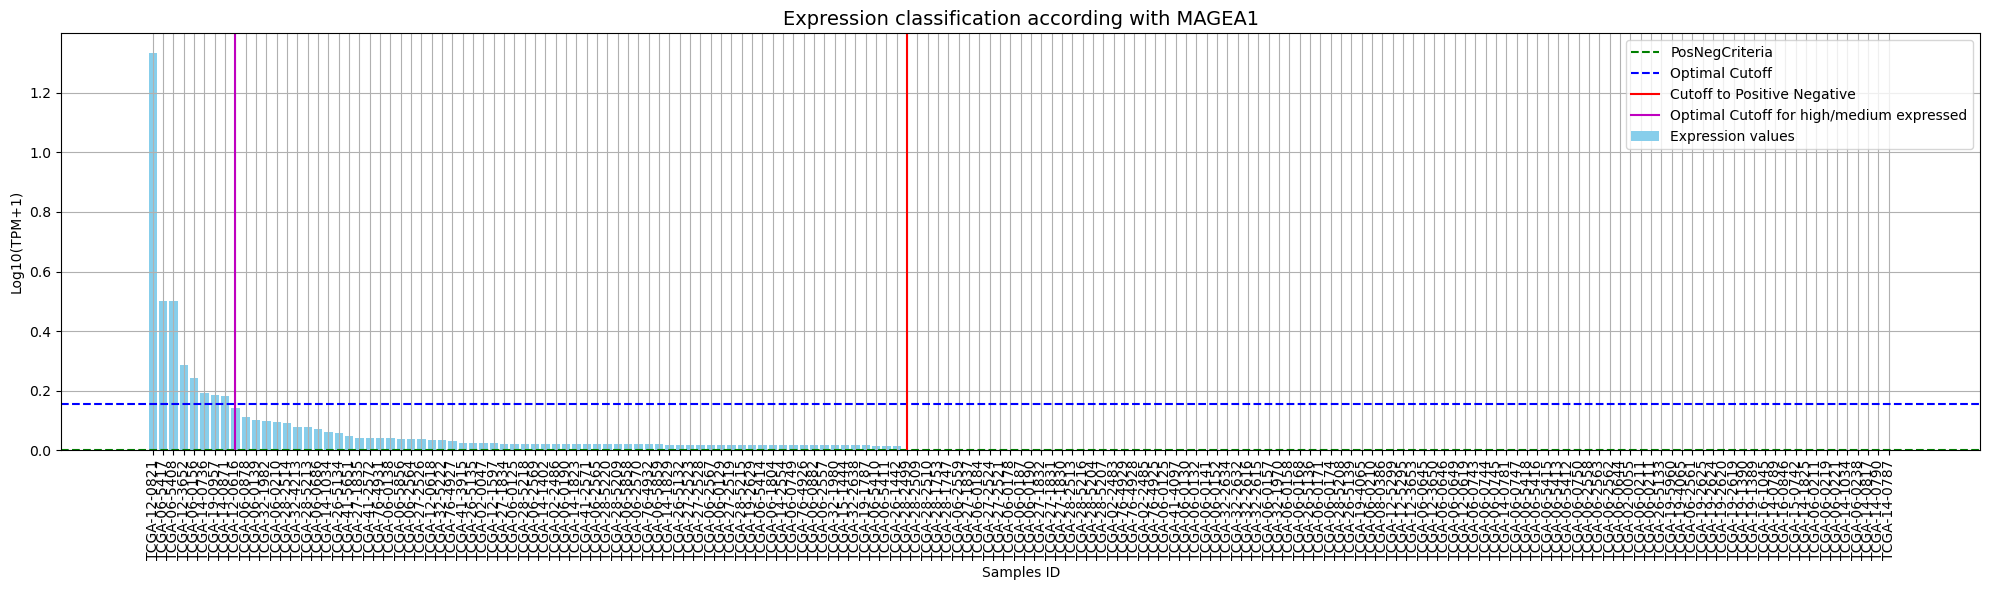

Optimal cutoff value: 0.4265876848637536 TPMs,  Normalized:  0.1542984706177915


In [21]:
print(df[GeneName].describe())
cutoff_value, optimal_diff, optimal_labels, optimal_centroids = find_optimal_cutoff(df_numeric, [GeneName], PosNegCriteria)
if cutoff_value != -1:
    print("Optimal cutoff value:", cutoff_value, "TPMs, ", "Normalized: ", np.log10(cutoff_value + 1))

Genename: MAGEA1
log10(cutoff to Positive/Negative+1):  0.0
log10(Cutoff for High and medium+1):  0.1542984706177915
(169, 27)
Category
Negative            96
Medium expressed    65
Highly expressed     8
Name: count, dtype: int64


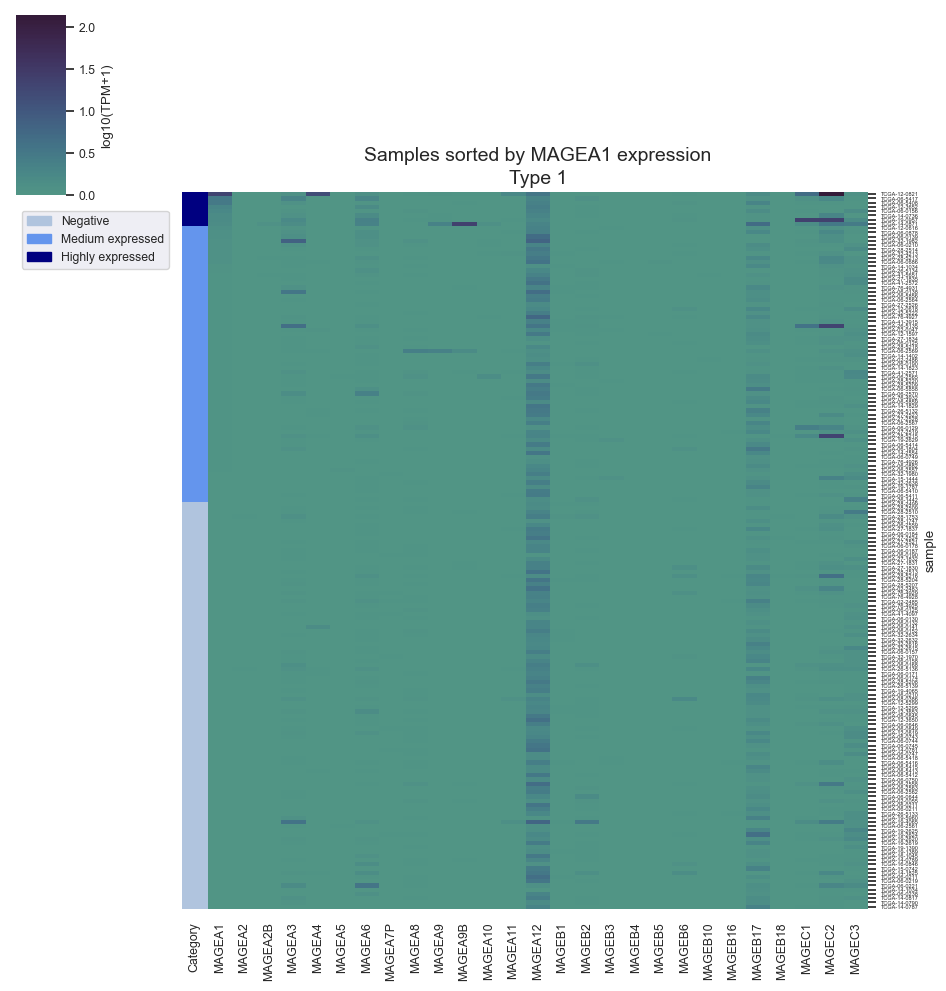

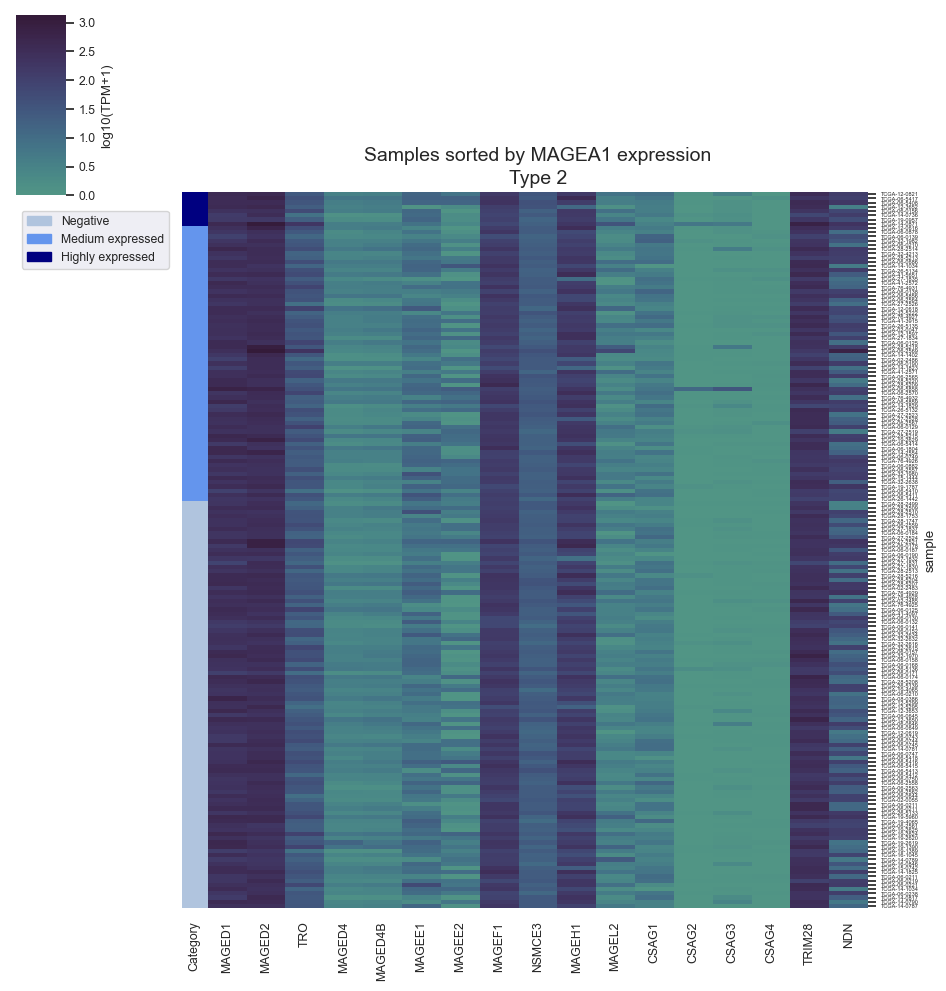

In [24]:
# Define the diverging color palette
custom_cmap = sns.cubehelix_palette(start=.8, rot=-1, as_cmap=True)
# Print information about the data
print('Genename: ' + GeneName)
print('log10(cutoff to Positive/Negative+1): ', np.log10(PosNegCriteria + 1))
print('log10(Cutoff for High and medium+1): ', np.log10(cutoff_value + 1))
# Sort the DataFrame based on GeneName column
sorted_df_numeric = df_numeric.sort_values(by=GeneName, ascending=False)
# Group rows into four categories based on sorted values of GeneName
sorted_df_numeric['Category'] = pd.cut(sorted_df_numeric[GeneName], bins=[-np.inf, PosNegCriteria, cutoff_value, np.inf], labels=['Negative', 'Medium expressed', 'Highly expressed'])
# Map categories to colors
color_map = {'Negative': 'lightsteelblue', 'Medium expressed': 'cornflowerblue', 'Highly expressed': 'navy'}
# Convert category labels to colors
row_colors = sorted_df_numeric['Category'].map(color_map)
# Normalize expression values
type1_df = np.log10(sorted_df_numeric[Type1] + 1)
print(type1_df.shape)
print(sorted_df_numeric['Category'].value_counts())
# Set font scale
sns.set(font_scale=0.8)
# Create the heatmap
g = sns.clustermap(type1_df, center=0, cbar_kws={'label': 'log10(TPM+1)'}, row_cluster=False, col_cluster=False, xticklabels=True, yticklabels=True, cmap=custom_cmap, row_colors=row_colors)
# Set font size for y-axis labels
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize=3)
# Set title
g.ax_heatmap.set_title('Type 1', fontsize=14)
# Set tick parameters
g.ax_heatmap.tick_params(axis='y', which='major', labelsize=4)
# Add text annotation indicating the ordering using GeneName
g.ax_heatmap.text(0.5, 1.05, 'Samples sorted by ' + GeneName + ' expression', horizontalalignment='center', verticalalignment='center', transform=g.ax_heatmap.transAxes, fontsize=14)
# Create a color bar for the category labels
color_bar = sns.color_palette([color_map[x] for x in ['Negative', 'Medium expressed', 'Highly expressed']])
legend = plt.legend(handles=[plt.Rectangle((0, 0), 1, 1, color=color) for color in color_bar], labels=color_map.keys(), bbox_to_anchor=(0.000000000001, -0.05), loc='upper left')
# Show the plot
plt.show()

# Normalize expression values
type2_df = np.log10(sorted_df_numeric[Type2] + 1)
# Set font scale
sns.set(font_scale=0.8)
# Create the heatmap
g = sns.clustermap(type2_df, center=0, cbar_kws={'label': 'log10(TPM+1)'}, row_cluster=False, col_cluster=False, xticklabels=True, yticklabels=True, cmap=custom_cmap, row_colors=row_colors)
# Set font size for y-axis labels
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize=3)
# Set title
g.ax_heatmap.set_title('Type 2', fontsize=14)
# Set tick parameters
g.ax_heatmap.tick_params(axis='y', which='major', labelsize=4)
# Add text annotation indicating the ordering using GeneName
g.ax_heatmap.text(0.5, 1.05, 'Samples sorted by ' + GeneName + ' expression', horizontalalignment='center', verticalalignment='center', transform=g.ax_heatmap.transAxes, fontsize=14)
# Create a color bar for the category labels
color_bar = sns.color_palette([color_map[x] for x in ['Negative', 'Medium expressed', 'Highly expressed']])
legend = plt.legend(handles=[plt.Rectangle((0, 0), 1, 1, color=color) for color in color_bar], labels=color_map.keys(), bbox_to_anchor=(0.000000000001, -0.05), loc='upper left')
# Show the plot
plt.show()

<h1><font color="#004D7F" size=4>2.4 Composition of Positive and Negative Tumors by MAGEs.</font></h1>

In [ ]:
no_zero = df_numeric.astype(bool).sum(axis=0)
zero = df_numeric.shape[0] - no_zero
# New df to order output
output_df = pd.DataFrame({'Positive_counts': no_zero, 'Negative_counts': zero})
output_df['Total_counts'] = output_df['Positive_counts'] + output_df['Negative_counts']
# Calculate percentages
percentage_df = output_df[['Positive_counts', 'Negative_counts']].div(output_df['Total_counts'], axis=0) * 100
# Concatenate percentages with original DataFrame
output_df = pd.concat([output_df, percentage_df.add_suffix('_percentage')], axis=1)
# Sort DataFrame by column names (alphabetical order)
output_df = output_df.sort_index()
finalTable= output_df[['Positive_counts','Positive_counts_percentage','Negative_counts','Negative_counts_percentage']]
finalTable=finalTable.round(1)
finalTable=finalTable.loc[column_order]
finalTable.to_csv('MAGEsComposition.csv')
finalTable.head(3)

In [ ]:
# Normalization
total_counts = no_zero + zero
positive_normalized = no_zero / total_counts
positive_normalized= positive_normalized[column_order]
negative_normalized = zero / total_counts
negative_normalized= negative_normalized[column_order]
# Set colors
colors_pastel = sns.color_palette("Set2")
# Stacked barplot
plt.figure(figsize=(10, 6))
positive_normalized.plot(kind='bar', color=colors_pastel[2], width=0.4, position=1, label='Positive')
negative_normalized.plot(kind='bar', color=colors_pastel[5], width=0.4, position=1, bottom=positive_normalized, label='Negative')
plt.title('Composition of Positive and Negative Tumors for MAGE')
plt.ylabel('Ratio of positive and negative samples')
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.text(1.09, 0.8, 'n=169', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.tight_layout()
plt.show()

<h1><font color="#004D7F" size=4>2.5 Kaplan-Meier curve.</font></h1>

In [ ]:
def find_optimal_cutoff(df, genes, value):
    # Select only the columns corresponding to the genes
    df_subset = df[genes]
    # Drop rows under positive/negative threshold
    df_subset = df_subset[(df_subset > value).any(axis=1)].dropna()
    print("Name of gene:", genes)
    print("Shape of df_subset:", df_subset.shape)
    # Fit an exponential distribution to the data
    params = expon.fit(df_subset.values.ravel())
    # Generate samples from the fitted distribution
    samples = expon.rvs(*params, size=1000)
    # Cluster the samples using DBSCAN
    dbscan = DBSCAN(eps=0.1, min_samples=5)
    labels = dbscan.fit_predict(samples.reshape(-1, 1))
    unique_labels, counts = np.unique(labels, return_counts=True)
    print("Finding optimal cutoff...")
    # Check if there are at least two clusters
    if len(unique_labels) >= 2:
        # Sort clusters by size
        sorted_clusters = sorted(zip(unique_labels, counts), key=lambda x: x[1], reverse=True)
        # Calculate the difference between the means of the two largest clusters
        cluster1_indices = np.where(labels == sorted_clusters[0][0])[0]
        cluster2_indices = np.where(labels == sorted_clusters[1][0])[0]
        cluster1_mean = np.mean(samples[cluster1_indices])
        cluster2_mean = np.mean(samples[cluster2_indices])
        diff = np.abs(cluster1_mean - cluster2_mean)
        # Update optimal cutoff and optimal difference if difference is maximized
        optimal_cutoff = np.min([cluster1_mean, cluster2_mean])
        optimal_diff = diff
        optimal_labels = labels
        min_input = np.min(df_subset)
        max_input = np.max(df_subset)
        print("Min input:", min_input)
        print("Max input:", max_input)
        print("TPM Positive/Negative threshold:", value)
        print("log10(TPM+1) Positive/Negative threshold:", np.log10(value + 1))
    else:
        print("No optimal cutoff found greater than PosNegCriteria. Returning default values.")
        return -1, None, None, None
    # Sort dataframe based on the selected gene in descending order
    sorted_df = df.sort_values(by=genes[0], ascending=False)
    sample_names = sorted_df.index  # Extract sample names from index
    return optimal_cutoff, optimal_diff, optimal_labels, None

In [ ]:
# Drop rows with missing or non-numeric values
df = df.dropna(subset=['days_to_death', 'vital_status'])
df = df[pd.to_numeric(df['days_to_death'], errors='coerce').notnull()]  # Ensure 'days_to_death' contains numeric values
df['days_to_death'] = pd.to_numeric(df['days_to_death'], errors='coerce')
# Convert 'vital_status' to categorical values
df['vital_status'] = df['vital_status'].astype('category')
# Plotting
num_cols = 4
num_rows = (len(column_order) + num_cols - 1) // num_cols  # Calculate the number of rows needed

plt.figure(figsize=(15, 4 * num_rows))  # Adjust figure size based on the number of rows
sns.set_style("whitegrid")

# Iterate over each gene column
for i, gene in enumerate(column_order):
    plt.subplot(num_rows, num_cols, i + 1)
    
    cutoff_value, optimal_diff, optimal_labels, optimal_centroids = find_optimal_cutoff(df, [gene], 0)
    print("Optimal cutoff value:", cutoff_value, "TPMs, ", "Normalized: ", np.log10(cutoff_value + 1))
    # Filter the data based on gene expression levels
    high_expr_data = df[df[gene] > cutoff_value]
    medium_expr_data = df[(df[gene] > 0) & (df[gene] <= cutoff_value)]
    negative_expr_data = df[df[gene] == 0]  # Filter for values equal to 0
    print("Number of rows in high_expr_data:", high_expr_data.shape[0])
    print("Number of rows in medium_expr_data:", medium_expr_data.shape[0])
    print("Number of rows in negative_expr_data:", negative_expr_data.shape[0], '\n')
    # Create a KaplanMeierFitter object
    kmf = KaplanMeierFitter()

    # Fit the Kaplan-Meier curve for high expression data
    kmf.fit(durations=high_expr_data['days_to_death'], event_observed=high_expr_data['vital_status'] == 'Dead', label='High Expression')
    kmf.plot()

    # Fit the Kaplan-Meier curve for medium expression data if there are entries
    if not medium_expr_data.empty:
        kmf.fit(durations=medium_expr_data['days_to_death'], event_observed=medium_expr_data['vital_status'] == 'Dead', label='Medium Expression')
        kmf.plot()
    
    # Fit the Kaplan-Meier curve for negative expression data if there are entries
    if not negative_expr_data.empty:
        kmf.fit(durations=negative_expr_data['days_to_death'], event_observed=negative_expr_data['vital_status'] == 'Dead', label='Negative Expression')
        kmf.plot()

    # Add labels and title
    plt.xlabel('Time (days)')
    plt.ylabel('Survival Probability')
    plt.title(f'Kaplan-Meier Curve for {gene} \n High: {high_expr_data.shape[0]} | Medium: {medium_expr_data.shape[0]} | Negative: {negative_expr_data.shape[0]}')

    # Add legend
    plt.legend()

plt.tight_layout()  # Adjust subplot layout to prevent overlap
plt.show()

<h1><font color="#004D7F" size=4>2.5. Overview clinical data.</font></h1>

<h3>Definitions:</h3>

**ethnicity:** An individual's self-described social and cultural grouping, specifically whether an individual describes themselves as Hispanic or Latino. The provided values are based on the categories defined by the U.S. Office of Management and Business and used by the U.S. Census Bureau.<br>
**gender:** Text designations that identify gender. Gender is described as the assemblage of properties that distinguish people on the basis of their societal roles. [Explanatory Comment 1: Identification of gender is based upon self-report and may come from a form, questionnaire, interview, etc.]<br>
**race:** An arbitrary classification of a taxonomic group that is a division of a species. It usually arises as a consequence of geographical isolation within a species and is characterized by shared heredity, physical attributes and behavior, and in the case of humans, by common history, nationality, or geographic distribution. The provided values are based on the categories defined by the U.S. Office of Management and Business and used by the U.S. Census Bureau.<br>
**vital_status:** The survival state of the person registered on the protocol.<br>
**treatment_or_therapy:** A yes/no/unknown/not applicable indicator related to the administration of therapeutic agents received.<br>
**treatment_type:** Text term that describes the kind of treatment administered.<br>

[TCGA- Data Dictionary](https://docs.gdc.cancer.gov/Data_Dictionary/viewer/#?view=table-entity-list&anchor=clinical)

In [ ]:
df_filled = df.copy()
# Define columns for bar plots
columns_bar = ['ethnicity', 'gender', 'race', 'vital_status', 'treatment_or_therapy', 'treatment_type']
# Calculate the number of rows and columns needed for subplots
num_cols_bar = 3  # Number of columns in the subplot grid for bar plots
num_rows_bar = (len(columns_bar) + num_cols_bar - 1) // num_cols_bar  # Calculate the number of rows needed
# Create a figure and set its size
plt.figure(figsize=(15, 20))
# Set a title for the entire figure
plt.suptitle('Overview for Relevant Clinical Data', fontsize=16)
# Loop through each column and create a subplot
colors_pastel = sns.color_palette("Set2")
for i, column in enumerate(columns_bar, 1):
    plt.subplot(num_rows_bar, num_cols_bar, i)
    # Plot bar plot for the current column
    counts = df_filled[column].value_counts()
    counts.plot(kind='bar', color=colors_pastel[2])
    # Annotate each bar with the count value if possible
    for j, count in enumerate(counts):
        plt.text(j, count + 0.5, str(count), ha='center', va='bottom')
    # Remove x-axis label
    plt.xlabel('')
    # Set y-axis label
    plt.ylabel('Count')
    # Set title for the subplot
    plt.title(column)
# Adjust the layout to prevent overlapping of subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# Show the plot
plt.show()

<h3>Definitions:</h3>

**age_at_index:** The patient's age (in years) on the reference or anchor date used during date obfuscation.<br>
**days_to_birth:** Number of days between the date used for index and the date from a person's date of birth represented as a calculated negative number of days.<br>
**days_to_death:** Number of days between the date used for index and the date from a person's date of death represented as a calculated number of days.<br>
**days_to_last_follow_up:** Time interval from the date of last follow up to the date of initial pathologic diagnosis, represented as a calculated number of days.<br>
**year_of_birth:** Numeric value to represent the calendar year in which an individual was born.<br>
**year_of_death:** Numeric value to represent the year of the death of an individual.<br>
**age_at_diagnosis:** Age at the time of diagnosis expressed in number of days since birth.<br>
**year_of_diagnosis:** Numeric value to represent the year of an individual's initial pathologic diagnosis of cancer.<br>

[TCGA- Data Dictionary](https://docs.gdc.cancer.gov/Data_Dictionary/viewer/#?view=table-entity-list&anchor=clinical)

In [ ]:
# Define columns for boxplots (removed 'age_at_index')
columns_box = ['days_to_birth', 'days_to_death', 'days_to_last_follow_up', 'year_of_birth', 'year_of_death',
               'age_at_diagnosis', 'year_of_diagnosis']
# Remove NaN values from specified columns
df_filled = df_filled.dropna(subset=columns_box)
# Calculate the number of rows and columns needed for subplots
num_cols_box = 4  # Number of columns in the subplot grid for bar plots
num_rows_box = (len(columns_box) + num_cols_box - 1) // num_cols_box  # Calculate the number of rows needed
# Create a figure and set its size
plt.figure(figsize=(15, 20))
# Set a title for the entire figure
plt.suptitle('Overview for Relevant Clinical Data', fontsize=16)
# Loop through each column and create a subplot
for i, column in enumerate(columns_box, 1):
    plt.subplot(num_rows_box, num_cols_box, i)
    # Plot box plot for the current column without 0 values
    df_column = pd.to_numeric(df_filled[column], errors='coerce')
    df_column = df_column[df_column != 0]
    df_column.plot(kind='box')
    # Set subplot title
    plt.title(column)
# Adjust the layout to prevent overlapping of subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# Show the plot
plt.show()

In [ ]:
# Define columns for histograms (Removed 'age_at_index')
columns_hist = ['days_to_birth', 'days_to_death', 'days_to_last_follow_up', 'year_of_birth', 'year_of_death',
               'age_at_diagnosis', 'year_of_diagnosis']
# Remove NaN values from specified columns
df_filled = df_filled.dropna(subset=columns_hist)
# Calculate the number of rows and columns needed for subplots
num_cols_hist = 4  # Number of columns in the subplot grid for histograms
num_rows_hist = (len(columns_hist) + num_cols_hist - 1) // num_cols_hist  # Calculate the number of rows needed
# Create a figure and set its size
plt.figure(figsize=(15, 20))
# Set a title for the entire figure
plt.suptitle('Overview for Relevant Clinical Data', fontsize=16)
# Loop through each column and create a subplot
for i, column in enumerate(columns_hist, 1):
    plt.subplot(num_rows_hist, num_cols_hist, i)
    # Plot histogram for the current column without 0 values
    df_column = pd.to_numeric(df_filled[column], errors='coerce')
    df_column = df_column[df_column != 0]
    df_column.hist()
    # Set subplot title
    plt.title(column)
# Adjust the layout to prevent overlapping of subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# Show the plot
plt.show()

In [ ]:
# Assuming you have a DataFrame named 'df' containing gene expression data and a column named 'gender'
genes = [
    "MAGEA1", "MAGEA2", "MAGEA2B", "MAGEA3", "MAGEA4", "MAGEA5", "MAGEA6", "MAGEA7P", "MAGEA8", "MAGEA9",
    "MAGEA9B", "MAGEA10", "MAGEA11", "MAGEA12", "MAGEB1", "MAGEB2", "MAGEB3", "MAGEB4", "MAGEB5", "MAGEB6",
    "MAGEB10", "MAGEB16", "MAGEB17", "MAGEB18", "MAGEC1", "MAGEC2", "MAGEC3", "MAGED1", "MAGED2", "TRO","MAGED4",
    "MAGED4B", "MAGEE1", "MAGEE2", "MAGEF1", "NSMCE3","MAGEH1", "MAGEL2", "CSAG1", "CSAG2", "CSAG3", "CSAG4", "TRIM28", "NDN"
]

# Extract unique categories from the 'gender' column
genders = df['gender'].unique()

# Initialize a dictionary to store counts
counts_dict = {'Gene': [], 'Gender': [], 'Positive': [], 'Negative': []}

# Iterate over each MAGE gene and sex
for gene in genes:
    for gender in genders:
        # Filter dataframe for the current MAGE gene and sex
        filtered_df = df[(df[gene] > 0) & (df['gender'] == gender)]   
        
        # Count positive and negative cases
        positive_count = filtered_df.shape[0]
        negative_count = df[(df[gene] == 0) & (df['gender'] == gender)].shape[0]
        
        # Append counts to the dictionary
        counts_dict['Gene'].append(gene)
        counts_dict['Gender'].append(gender)
        counts_dict['Positive'].append(positive_count)
        counts_dict['Negative'].append(negative_count)

# Create a new dataframe from the counts dictionary
counts_df = pd.DataFrame(counts_dict)

# Display the resulting dataframe
counts_df['Total'] = counts_df['Positive']+counts_df['Negative']
counts_df['PositiveRatio'] = counts_df['Positive'] / counts_df['Total']
counts_df['NegativeRatio'] = counts_df['Negative'] / counts_df['Total']
counts_df= counts_df.dropna(subset=['Gender'])
counts_df = subset['Gene','Gender','PositiveRatio', 'NegativeRatio']
print(counts_df)

In [ ]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=counts_df, x='Gene', y='Positive', hue='Gender', palette='pastel',errorbar=None)
plt.title('Positive Counts by Gene and Gender')
plt.ylabel('Count')
plt.xlabel('Gene')
plt.legend(title='Gender')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=counts_df, x='Gene', y='Negative', hue='Gender', palette='pastel',errorbar=None)
plt.title('Negative Counts by Gene and Gender')
plt.ylabel('Count')
plt.xlabel('Gene')
plt.legend(title='Gender')
plt.show()

In [ ]:
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Plot the first grouped bar plot
sns.barplot(ax=axes[0], x='Gene', y='Positive', hue='Gender', data=counts_df, palette='Set2', errorbar=None)
axes[0].set_title('Positive Cases by Gene and Gender')
axes[0].set_xlabel('')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=90)
axes[0].legend(title='Gender')

# Plot the second grouped bar plot
sns.barplot(ax=axes[1], x='Gene', y='Negative', hue='Gender', data=counts_df, palette='Set1', errorbar=None)
axes[1].set_title('Negative Cases by Gene and Gender')
axes[1].set_xlabel('')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=90)
axes[1].legend(title='Gender')

plt.tight_layout()
plt.show()

<h1><font color="#004D7F" size=4>2.6 Genes expression vs time after diagnosis.  </font></h1>

In [ ]:
# Convert 'days_to_death' and 'days_to_last_follow_up' to numeric
df['days_to_death'] = pd.to_numeric(df['days_to_death'], errors='coerce')
df['days_to_last_follow_up'] = pd.to_numeric(df['days_to_last_follow_up'], errors='coerce')

# Create new column 'years_after_diagnosis'
df['years_after_diagnosis'] = df.apply(lambda row: row['days_to_death'] / 365 if row['vital_status'] == 'Dead' else row['days_to_last_follow_up'] / 365, axis=1)

# Displaying the first few rows of the dataframe to verify the changes
df.head(2)

In [ ]:
# Reset index to avoid duplicate labels error
df_reset = df.reset_index()
# Normalize values by taking log10(values+1)
for gene in genes:
    df_reset[gene] = np.log10(df_reset[gene] + 1)

# Plotting
num_cols = 4
num_rows = (len(genes) + num_cols - 1) // num_cols  # Calculate the number of rows needed

plt.figure(figsize=(15, 4 * num_rows))  # Adjust figure size based on the number of rows
sns.set_style("whitegrid")

for i, gene in enumerate(genes, start=1):
    plt.subplot(num_rows, num_cols, i)
    sns.scatterplot(y='years_after_diagnosis', x=gene, hue='vital_status', data=df_reset, alpha=0.7)  # Transposed x and y
    plt.title(f'{gene} Survival scatter plot')
    plt.xlabel('Log10(TPM+1)')  # Adjusted label
    plt.ylabel('Years after Diagnosis')  # Adjusted label
    plt.legend(title='Vital Status')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<h1><font color="#004D7F" size=5>3. Complex Data exploration</font></h1>

<h1><font color="#004D7F" size=4>3.1. PCA Tumors against categorical (clinical) variables.</font></h1>

In [ ]:
# Load dataset
column_order = ["MAGEA1", "MAGEA2", "MAGEA2B", "MAGEA3", "MAGEA4", "MAGEA5", "MAGEA6", "MAGEA7P", "MAGEA8", "MAGEA9",
    "MAGEA9B", "MAGEA10", "MAGEA11", "MAGEA12", "MAGEB1", "MAGEB2", "MAGEB3", "MAGEB4", "MAGEB5", "MAGEB6",
    "MAGEB10", "MAGEB16", "MAGEB17", "MAGEB18", "MAGEC1", "MAGEC2", "MAGEC3", "MAGED1", "MAGED2", "TRO","MAGED4",
    "MAGED4B", "MAGEE1", "MAGEE2", "MAGEF1", "MAGEH1", "MAGEL2", "CSAG1", "CSAG2", "CSAG3", "CSAG4", "TRIM28", "NDN", "gender", "vital_status", "ethnicity", "treatment_type"]
# Subsample the DataFrame
df_gender = df[column_order].copy()
# type 1 genes
subtype1_genes = [
    "MAGEA1", "MAGEA2", "MAGEA2B", "MAGEA3", "MAGEA4", "MAGEA5", "MAGEA6", "MAGEA7P", "MAGEA8", "MAGEA9",
    "MAGEA9B", "MAGEA10", "MAGEA11", "MAGEA12", "MAGEB1", "MAGEB2", "MAGEB3", "MAGEB4", "MAGEB5", "MAGEB6",
    "MAGEB10", "MAGEB16", "MAGEB17", "MAGEB18", "MAGEC1", "MAGEC2", "MAGEC3"
]
# type 2 genes
subtype2_genes = [
    "MAGED1", "MAGED2", "TRO","MAGED4",
    "MAGED4B", "MAGEE1", "MAGEE2", "MAGEF1", "MAGEH1", "MAGEL2", "CSAG1", "CSAG2", "CSAG3", "CSAG4", "TRIM28", "NDN"
]
# List of target columns
target_columns = ['gender','vital_status', 'ethnicity', 'treatment_type']
for target_column in target_columns:
    print("Analyzing target column:", target_column)
    # Separating type 1 and type 2 genes along with target column
    subtype1_data = df_gender.loc[:, subtype1_genes + [target_column]].copy()
    subtype2_data = df_gender.loc[:, subtype2_genes + [target_column]].copy()
    # Drop rows with NaN values
    subtype1_data.dropna(inplace=True)
    subtype2_data.dropna(inplace=True)
    # Standardizing the features for both types
    subtype1_data.iloc[:, :-1] = StandardScaler().fit_transform(subtype1_data.iloc[:, :-1])
    subtype2_data.iloc[:, :-1] = StandardScaler().fit_transform(subtype2_data.iloc[:, :-1])
    # Reset index to avoid duplicate labels
    subtype1_data.reset_index(drop=True, inplace=True)
    subtype2_data.reset_index(drop=True, inplace=True)
    # PCA with 2 components for subtype 1 genes
    pca1 = PCA(n_components=2)
    principalComponents1 = pca1.fit_transform(subtype1_data.iloc[:, :-1])
    principalDf1 = pd.DataFrame(data=principalComponents1, columns=['principal component 1', 'principal component 2'])
    # Adding target column to the PCA DataFrame for type 1
    principalDf1[target_column] = subtype1_data[target_column]
    # Explained variance ratio for PCA 1
    print("Explained Variance Ratio for PCA 1 with", target_column, "as target:", pca1.explained_variance_ratio_)
    # PCA with 2 components for subtype 2 genes
    pca2 = PCA(n_components=2)
    principalComponents2 = pca2.fit_transform(subtype2_data.iloc[:, :-1])
    principalDf2 = pd.DataFrame(data=principalComponents2, columns=['principal component 1', 'principal component 2'])
    # Adding target column to the PCA DataFrame for subtype 2
    principalDf2[target_column] = subtype2_data[target_column]
    # Explained variance ratio for PCA 2
    print("Explained Variance Ratio for PCA 2 with", target_column, "as target:", pca2.explained_variance_ratio_, "\n")
    # Plotting the PCA results in 2D for subtype 1 genes
    plt.figure(figsize=(10, 6))
    plt.suptitle("PCA for type 1 and type 2 Genes using " + target_column + " as target", fontsize=16)
    plt.subplot(1, 2, 1)
    targets = subtype1_data[target_column].unique()
    colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightyellow', 'lavender']  # Adjust colors if more unique categories
    for target, color in zip(targets, colors):
        indicesToKeep = principalDf1[target_column] == target
        plt.scatter(principalDf1.loc[indicesToKeep, 'principal component 1'],
                    principalDf1.loc[indicesToKeep, 'principal component 2'], c=color, s=50)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('PCA for type 1 Genes')
    plt.legend(targets)
    # Plotting the PCA results in 2D for subtype 2 genes
    plt.subplot(1, 2, 2)
    for target, color in zip(targets, colors):
        indicesToKeep = principalDf2[target_column] == target
        plt.scatter(principalDf2.loc[indicesToKeep, 'principal component 1'],
                    principalDf2.loc[indicesToKeep, 'principal component 2'], c=color, s=50)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('PCA for type 2 Genes')
    plt.legend(targets)
    plt.tight_layout()
    plt.show()

<h1><font color="#004D7F" size=4>Extras</font></h1>

<h1><font color="#004D7F" size=4>PCA including all genes by gender</font></h1>

In [ ]:
# Load dataset
#column_order = ["MAGEA1", "MAGEA2", "MAGEA2B", "MAGEA3", "MAGEA4", "MAGEA5", "MAGEA6", "MAGEA7P", "MAGEA8", "MAGEA9","MAGEA9B", "MAGEA10", "MAGEA11", "MAGEA12", "MAGEB1", "MAGEB2", "MAGEB3", "MAGEB4", "MAGEB5", "MAGEB6","MAGEB10", "MAGEB16", "MAGEB17", "MAGEB18", "MAGEC1", "MAGEC2", "MAGEC3", "MAGED1", "MAGED2", "MAGED4","MAGED4B", "MAGEE1", "MAGEE2", "MAGEF1", "MAGEH1", "MAGEL2", "CSAG1", "CSAG2", "CSAG3", "CSAG4", "TRIM28", 'gender']
column_order = ["MAGEA1", "MAGEA2", "MAGEA2B", "MAGEA3", "MAGEA4", "MAGEA5", "MAGEA6", "MAGEA7P", "MAGEA8", "MAGEA9","MAGEA9B", "MAGEA10", "MAGEA11", "MAGEA12", "MAGEB1", "MAGEB2", "MAGEB3", "MAGEB4", "MAGEB5", "MAGEB6","MAGEB10", "MAGEB16", "MAGEB17", "MAGEB18", "MAGEC1", "MAGEC2", "MAGEC3", "MAGED1", "MAGED2", "MAGED4","MAGED4B", "MAGEE1", "MAGEE2", "MAGEF1", "MAGEH1", "MAGEL2", 'gender']
# Subsample the DataFrame
df_gender = df[column_order].copy()
features = column_order[:-1]  # Exclude the 'gender' column
# Separating out the features
x = df_gender.loc[:, features].values
# Separating out the target
y = df_gender.loc[:,['gender']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
# PCA with 2 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])
# Resetting the index of df_gender
df_gender.reset_index(drop=True, inplace=True)
# Concatenating with the gender column
finalDf = pd.concat([principalDf, df_gender['gender']], axis=1)
# Plotting the PCA results in 2D
plt.figure(figsize=(4,3))
targets = ['male', 'female']  # Assuming 'gender' column values are 'Male' and 'Female'
colors = ['b', 'r']  # Blue for Male, Red for Female
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['gender'] == target
    plt.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
                finalDf.loc[indicesToKeep, 'principal component 2'],
                c=color, s=50)
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.legend(targets)
plt.title('PCA of Tumors ')
plt.show()

In [16]:
###Cutoff generation using points to plot
def plot_results(sorted_df, genes, value, optimal_cutoff, sample_names):
    plt.figure(figsize=(20, 6))
    plt.plot(range(len(sorted_df[genes])), np.log10(sorted_df[genes]+ 1), marker='o', linestyle='', label='Expression values')
    
    # Plot lines at the points where the curve intersects the X-axis for PosNegCriteria and cutoff_value
    posneg_criteria_value = np.log10(value+1)
    plt.axhline(y=posneg_criteria_value, color='g', linestyle='--', label='PosNegCriteria')
    plt.axhline(y=np.log10(optimal_cutoff+1), color='b', linestyle='--', label='Optimal Cutoff')
    
    # Find the index where the horizontal line intersects with the data for PosNegCriteria
    intersect_index_posneg = np.argmin(np.abs(np.log10(sorted_df[genes]+1) - posneg_criteria_value))
    intersect_x_posneg = intersect_index_posneg
    intersect_y_posneg = np.log10(sorted_df.iloc[intersect_index_posneg][genes] + 1)
    
    # Find the index where the horizontal line intersects with the data for Optimal Cutoff
    intersect_index_optimal = np.argmin(np.abs(np.log10(sorted_df[genes]+1) - np.log10(optimal_cutoff+1)))
    intersect_x_optimal = intersect_index_optimal
    intersect_y_optimal = np.log10(sorted_df.iloc[intersect_index_optimal][genes] + 1)
    
    # Plot vertical lines at the intersection points
    plt.axvline(x=intersect_x_posneg, color='r', linestyle='-', label='Cutoff to Positive Negative')
    plt.axvline(x=intersect_x_optimal, color='m', linestyle='-', label='Optimal Cutoff for high/medium expressed')
    
    plt.title(f"Expression classification according with {genes[0]}", fontsize=14)
    plt.xlabel('Samples ID')
    plt.ylabel('Log10(TPM+1)')
    plt.xticks(range(len(sample_names)), sample_names, rotation=90)  # Rotate x-axis labels by 90 degrees
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def find_optimal_cutoff(df, genes, value):
    # Select only the columns corresponding to the genes
    df_subset = df[genes]
    # Drop rows under positive/negative threshold
    df_subset = df_subset[(df_subset > value).any(axis=1)].dropna()
    print("Type of df_subset:", type(df_subset))
    print("Shape of df_subset:", df_subset.shape)
    # Fit an exponential distribution to the data
    params = expon.fit(df_subset.values.ravel())
    # Generate samples from the fitted distribution
    samples = expon.rvs(*params, size=1000)
    # Cluster the samples using DBSCAN
    dbscan = DBSCAN(eps=0.1, min_samples=5)
    labels = dbscan.fit_predict(samples.reshape(-1, 1))
    unique_labels, counts = np.unique(labels, return_counts=True)
    print("Finding optimal cutoff...")
    # Check if there are at least two clusters
    if len(unique_labels) >= 2:
        # Sort clusters by size
        sorted_clusters = sorted(zip(unique_labels, counts), key=lambda x: x[1], reverse=True)
        # Calculate the difference between the means of the two largest clusters
        cluster1_indices = np.where(labels == sorted_clusters[0][0])[0]
        cluster2_indices = np.where(labels == sorted_clusters[1][0])[0]
        cluster1_mean = np.mean(samples[cluster1_indices])
        cluster2_mean = np.mean(samples[cluster2_indices])
        diff = np.abs(cluster1_mean - cluster2_mean)
        # Update optimal cutoff and optimal difference if difference is maximized
        optimal_cutoff = np.min([cluster1_mean, cluster2_mean])
        optimal_diff = diff
        optimal_labels = labels
        min_input = np.min(df_subset)
        max_input = np.max(df_subset)
        print("Min input:", min_input)
        print("Max input:", max_input)
        print("TPM Positive/Negative threshold:", value)
        print("log10(TPM+1) Positive/Negative threshold:", np.log10(value + 1))
    else:
        print("No optimal cutoff found greater than PosNegCriteria. Returning default values.")
        return -1, None, None, None
    # Sort dataframe based on the selected gene in descending order
    sorted_df = df.sort_values(by=genes[0], ascending=False)
    sample_names = sorted_df.index  # Extract sample names from index
    plot_results(sorted_df, genes, value, optimal_cutoff, sample_names)
    return optimal_cutoff, optimal_diff, optimal_labels, None